In [7]:
##SPRINT 1 - EDA
##Step 1: Load and Explore the Data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('credit_risk_dataset.csv')

# Basic exploration
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (32581, 12)

First few rows:
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59             

In [9]:
##Step 2: Data Distribution Analysis

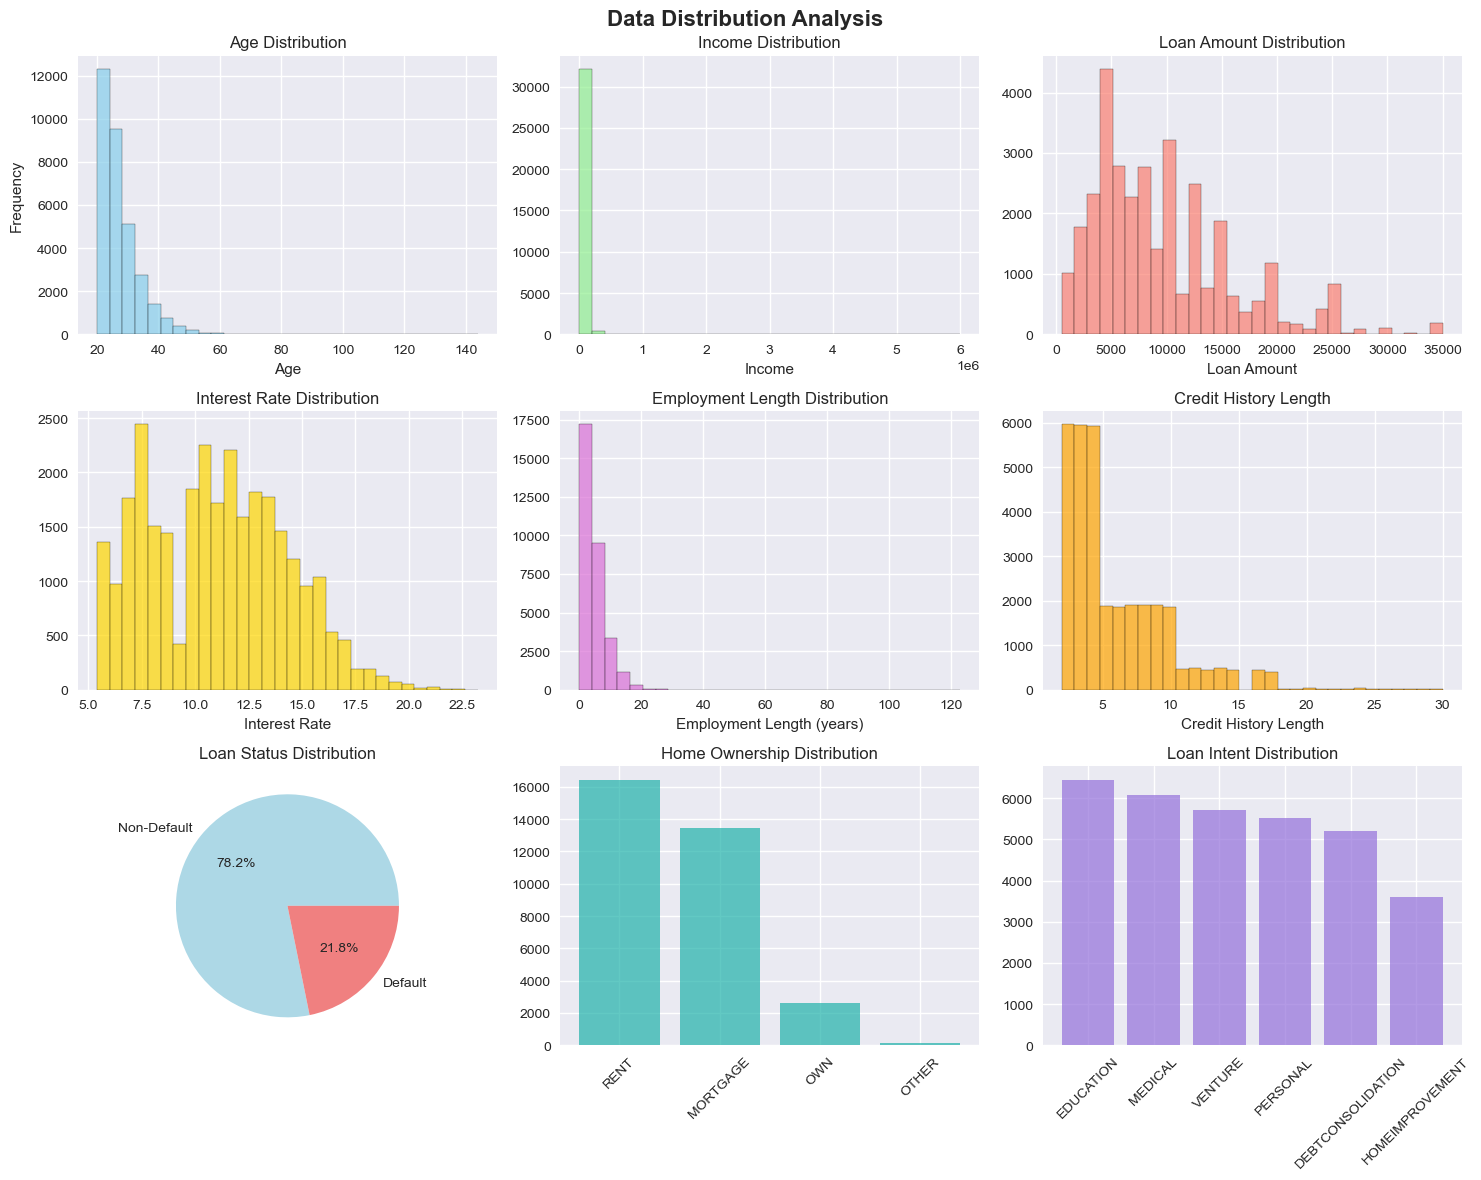

In [10]:
# Set up the plotting style
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Data Distribution Analysis', fontsize=16, fontweight='bold')

# Age distribution
axes[0,0].hist(df['person_age'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')

# Income distribution
axes[0,1].hist(df['person_income'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0,1].set_title('Income Distribution')
axes[0,1].set_xlabel('Income')

# Loan amount distribution
axes[0,2].hist(df['loan_amnt'], bins=30, color='salmon', edgecolor='black', alpha=0.7)
axes[0,2].set_title('Loan Amount Distribution')
axes[0,2].set_xlabel('Loan Amount')

# Interest rate distribution
axes[1,0].hist(df['loan_int_rate'].dropna(), bins=30, color='gold', edgecolor='black', alpha=0.7)
axes[1,0].set_title('Interest Rate Distribution')
axes[1,0].set_xlabel('Interest Rate')

# Employment length distribution
axes[1,1].hist(df['person_emp_length'].dropna(), bins=30, color='orchid', edgecolor='black', alpha=0.7)
axes[1,1].set_title('Employment Length Distribution')
axes[1,1].set_xlabel('Employment Length (years)')

# Credit history length
axes[1,2].hist(df['cb_person_cred_hist_length'], bins=30, color='orange', edgecolor='black', alpha=0.7)
axes[1,2].set_title('Credit History Length')
axes[1,2].set_xlabel('Credit History Length')

# Loan status (target variable)
loan_status_counts = df['loan_status'].value_counts()
axes[2,0].pie(loan_status_counts.values, labels=['Non-Default', 'Default'], autopct='%1.1f%%', 
              colors=['lightblue', 'lightcoral'])
axes[2,0].set_title('Loan Status Distribution')

# Home ownership
home_ownership_counts = df['person_home_ownership'].value_counts()
axes[2,1].bar(home_ownership_counts.index, home_ownership_counts.values, color='lightseagreen', alpha=0.7)
axes[2,1].set_title('Home Ownership Distribution')
axes[2,1].tick_params(axis='x', rotation=45)

# Loan intent
loan_intent_counts = df['loan_intent'].value_counts()
axes[2,2].bar(loan_intent_counts.index, loan_intent_counts.values, color='mediumpurple', alpha=0.7)
axes[2,2].set_title('Loan Intent Distribution')
axes[2,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [11]:
#Step 3: Relationship with Target Variable

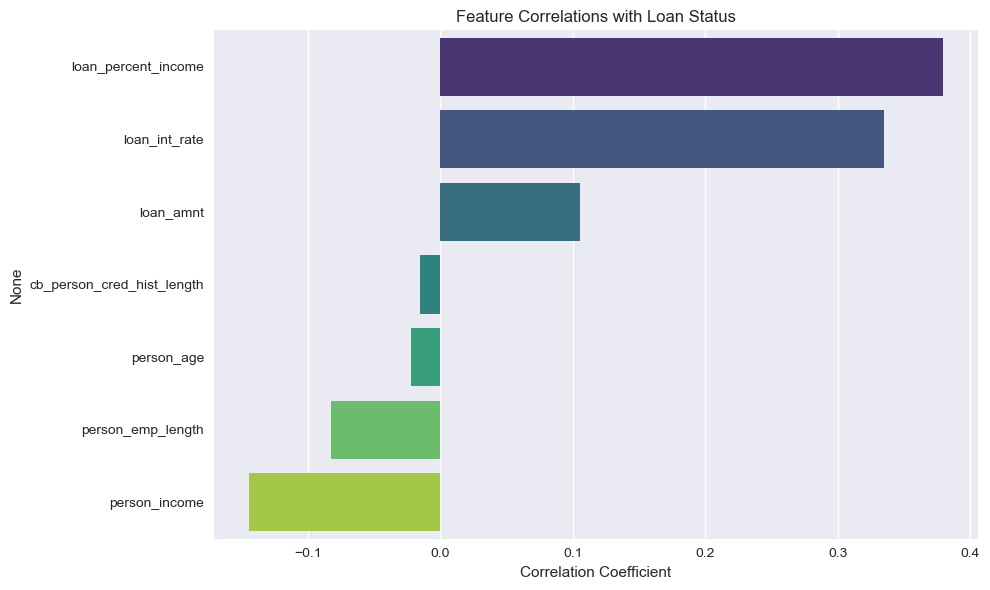

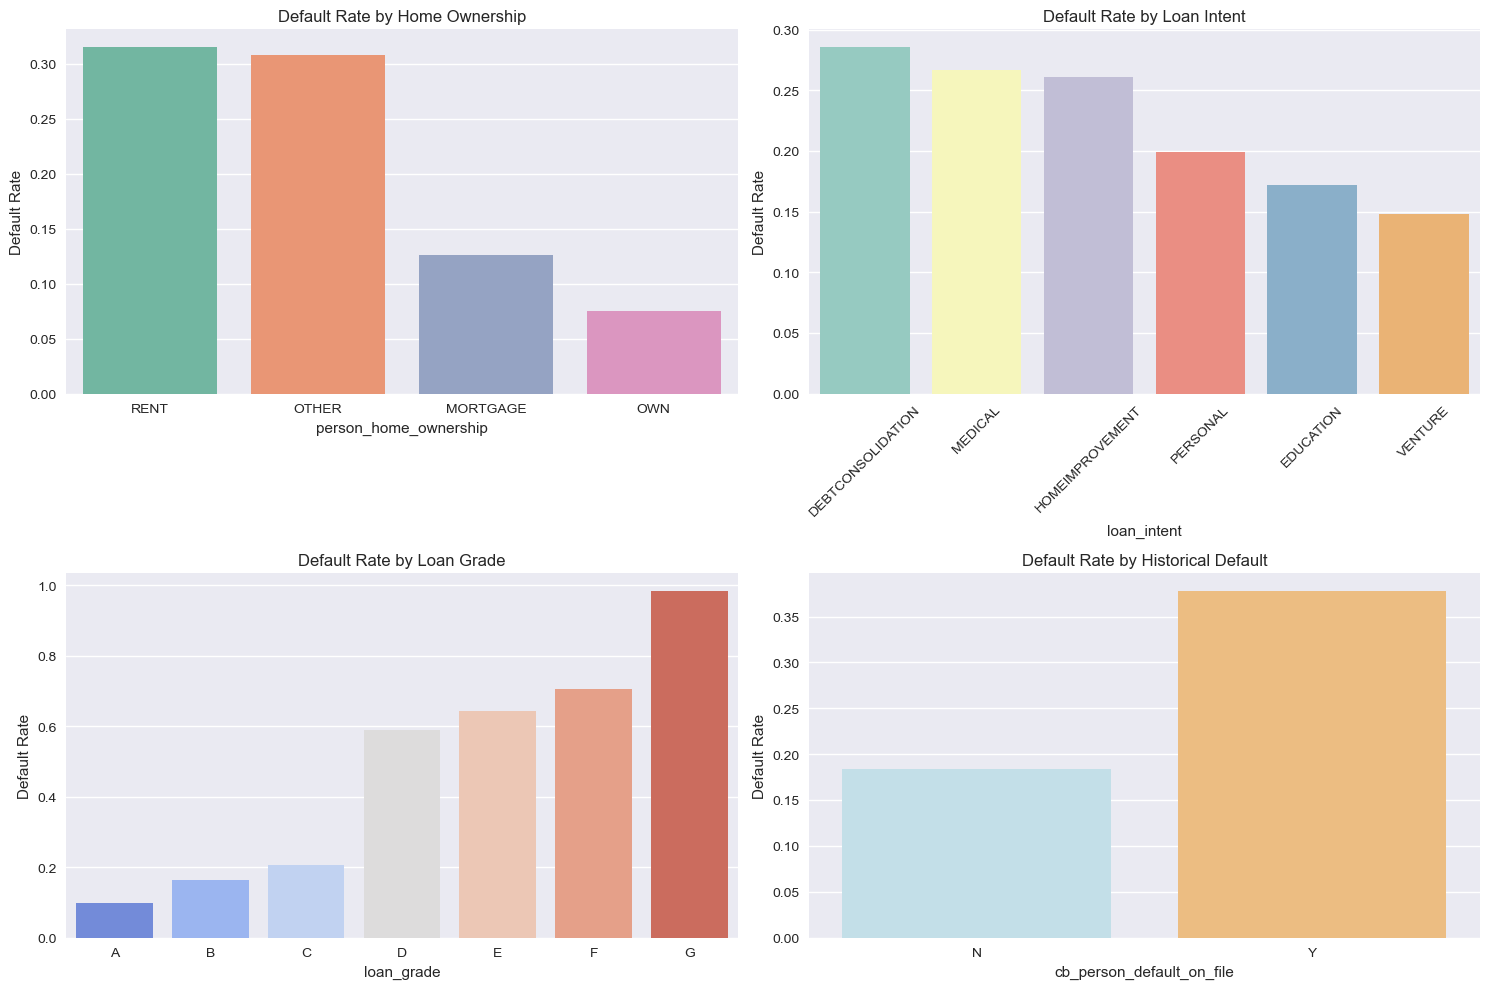

In [12]:
# Correlation with target variable
numeric_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 
               'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

# Calculate correlations with target
correlations = df[numeric_cols + ['loan_status']].corr()['loan_status'].drop('loan_status').sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')
plt.title('Feature Correlations with Loan Status')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

# Categorical variables vs target
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Home ownership vs default rate
home_ownership_default = df.groupby('person_home_ownership')['loan_status'].mean().sort_values(ascending=False)
sns.barplot(x=home_ownership_default.index, y=home_ownership_default.values, ax=axes[0,0], palette='Set2')
axes[0,0].set_title('Default Rate by Home Ownership')
axes[0,0].set_ylabel('Default Rate')

# Loan intent vs default rate
loan_intent_default = df.groupby('loan_intent')['loan_status'].mean().sort_values(ascending=False)
sns.barplot(x=loan_intent_default.index, y=loan_intent_default.values, ax=axes[0,1], palette='Set3')
axes[0,1].set_title('Default Rate by Loan Intent')
axes[0,1].set_ylabel('Default Rate')
axes[0,1].tick_params(axis='x', rotation=45)

# Loan grade vs default rate
loan_grade_default = df.groupby('loan_grade')['loan_status'].mean().sort_index()
sns.barplot(x=loan_grade_default.index, y=loan_grade_default.values, ax=axes[1,0], palette='coolwarm')
axes[1,0].set_title('Default Rate by Loan Grade')
axes[1,0].set_ylabel('Default Rate')

# Historical default vs current default
historical_default = df.groupby('cb_person_default_on_file')['loan_status'].mean()
sns.barplot(x=historical_default.index, y=historical_default.values, ax=axes[1,1], palette='RdYlBu_r')
axes[1,1].set_title('Default Rate by Historical Default')
axes[1,1].set_ylabel('Default Rate')

plt.tight_layout()
plt.show()

In [13]:
##Step 4: Key Patterns and Insights

In [17]:
# Detailed analysis of significant patterns
print("KEY INSIGHTS AND PATTERNS:")
print("="*50)

# 1. Default rate overall
default_rate = df['loan_status'].mean()
print(f"1. Overall Default Rate: {default_rate:.2%}")

# 2. Most risky loan intents
print("\n2. Default Rates by Loan Intent:")
for intent, rate in loan_intent_default.items():
    print(f"   {intent}: {rate:.2%}")


KEY INSIGHTS AND PATTERNS:
1. Overall Default Rate: 21.82%

2. Default Rates by Loan Intent:
   DEBTCONSOLIDATION: 28.59%
   MEDICAL: 26.70%
   HOMEIMPROVEMENT: 26.10%
   PERSONAL: 19.89%
   EDUCATION: 17.22%
   VENTURE: 14.81%


In [ ]:
#SPRINT 2 - Model Building
#Step 1-2: Data Preparation Setup

In [18]:
# Identify input and output variables
print("ML TASK IDENTIFICATION:")
print("Input Variables:", [col for col in df.columns if col != 'loan_status'])
print("Output/Target Variable: loan_status")
print("Type of ML Task: Classification (Binary Classification)")
print("Evaluation Metric: Accuracy")

# Handle missing values
df_clean = df.copy()

# Fill missing values
df_clean['person_emp_length'].fillna(df_clean['person_emp_length'].median(), inplace=True)
df_clean['loan_int_rate'].fillna(df_clean['loan_int_rate'].median(), inplace=True)

# Remove any remaining missing values
df_clean = df_clean.dropna()

print(f"Dataset after cleaning: {df_clean.shape}")

ML TASK IDENTIFICATION:
Input Variables: ['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length']
Output/Target Variable: loan_status
Type of ML Task: Classification (Binary Classification)
Evaluation Metric: Accuracy
Dataset after cleaning: (32581, 12)


In [19]:
#Step 3: Train-Test Split

In [20]:
# Define features and target
X = df_clean.drop('loan_status', axis=1)
y = df_clean['loan_status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"Default rate in training: {y_train.mean():.2%}")
print(f"Default rate in testing: {y_test.mean():.2%}")

Training set size: (24435, 11)
Testing set size: (8146, 11)
Default rate in training: 21.82%
Default rate in testing: 21.81%


In [21]:
#Step 4: Data Preprocessing

In [22]:
# Identify column types
numeric_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 
                   'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# Preprocessing pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[ ('num', StandardScaler(), numeric_features), ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)])

# Fit and transform training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"Processed training data shape: {X_train_processed.shape}")
print(f"Processed testing data shape: {X_test_processed.shape}")

Processed training data shape: (24435, 22)
Processed testing data shape: (8146, 22)


In [23]:
#Step 5: Model Training and Evaluation


K-Nearest Neighbors Results:
Accuracy: 0.8887

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      6369
           1       0.82      0.63      0.71      1777

    accuracy                           0.89      8146
   macro avg       0.86      0.79      0.82      8146
weighted avg       0.88      0.89      0.88      8146



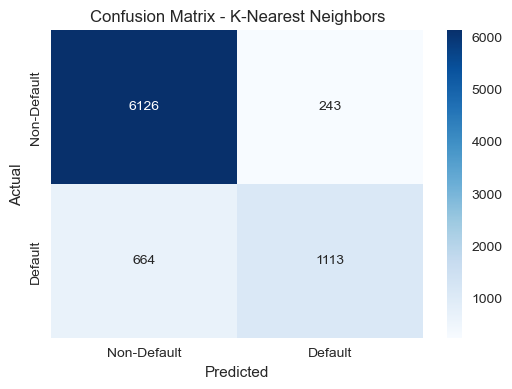


Naive Bayes Results:
Accuracy: 0.8337

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      6369
           1       0.68      0.45      0.54      1777

    accuracy                           0.83      8146
   macro avg       0.77      0.70      0.72      8146
weighted avg       0.82      0.83      0.82      8146



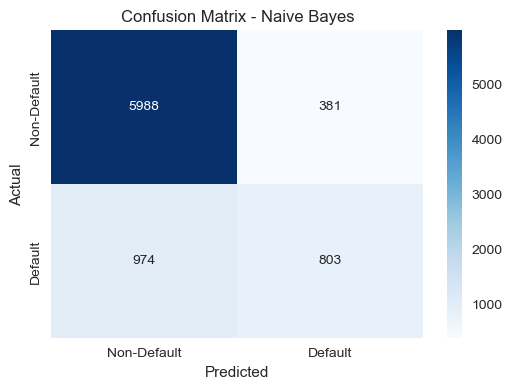

In [25]:
# Initialize models
models = {'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),'Naive Bayes': GaussianNB()}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Train model
    model.fit(X_train_processed, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_processed)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
               xticklabels=['Non-Default', 'Default'], 
               yticklabels=['Non-Default', 'Default'])
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
#Step 6: Model Comparison and Conclusion

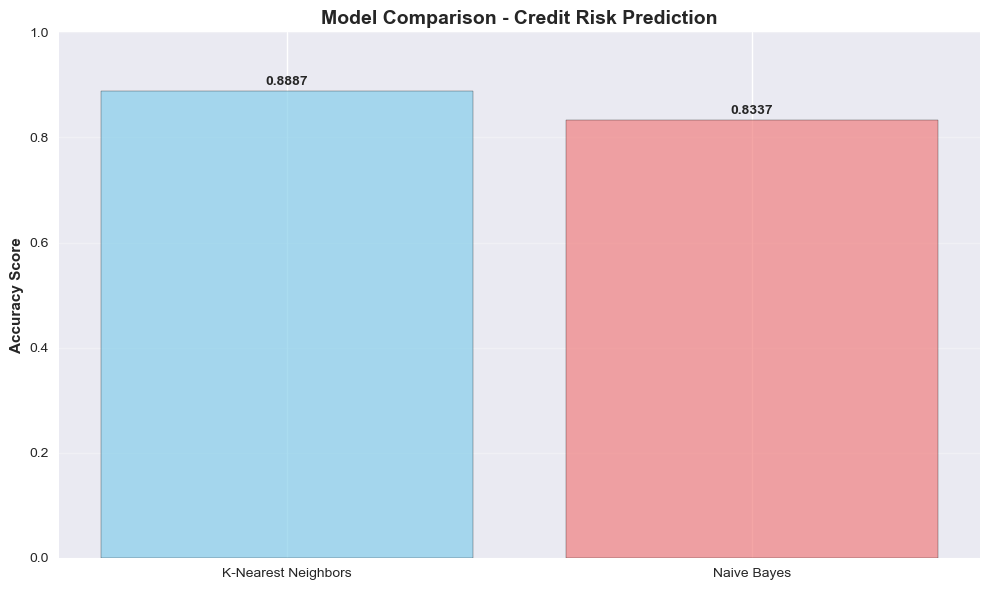


CONCLUSION AND RECOMMENDATIONS
Best performing model: K-Nearest Neighbors with accuracy: 0.8887

KEY INSIGHTS FROM EDA:
1. Higher loan percentage of income correlates with higher default rates
2. Customers with historical defaults are significantly more likely to default again
3. Lower loan grades (D, E, F) show much higher default rates
4. Medical and debt consolidation loans have higher risk
5. Renters show higher default rates compared to homeowners with mortgages

RECOMMENDATIONS FOR THE BANK:
1. Implement stricter scrutiny for loans exceeding 40% of customer income
2. Develop specialized risk assessment for customers with historical defaults
3. Create risk-based pricing models using loan grades and interest rates
4. Focus on income verification for renters and younger applicants
5. Use ML models for automated risk assessment to speed up loan approvals
6. Implement dynamic credit limits based on real-time risk scoring


In [26]:
# Plot model comparison
plt.figure(figsize=(10, 6))
models_list = list(results.keys())
accuracies = list(results.values())

bars = plt.bar(models_list, accuracies, color=['skyblue', 'lightcoral'], alpha=0.7, edgecolor='black')

# Add value labels on bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{accuracy:.4f}', ha='center', va='bottom', fontweight='bold')

plt.title('Model Comparison - Credit Risk Prediction', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy Score', fontweight='bold')
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Conclusion
best_model = max(results, key=results.get)
print("\n" + "="*60)
print("CONCLUSION AND RECOMMENDATIONS")
print("="*60)
print(f"Best performing model: {best_model} with accuracy: {results[best_model]:.4f}")
print("\nKEY INSIGHTS FROM EDA:")
print("1. Higher loan percentage of income correlates with higher default rates")
print("2. Customers with historical defaults are significantly more likely to default again")
print("3. Lower loan grades (D, E, F) show much higher default rates")
print("4. Medical and debt consolidation loans have higher risk")
print("5. Renters show higher default rates compared to homeowners with mortgages")

print("\nRECOMMENDATIONS FOR THE BANK:")
print("1. Implement stricter scrutiny for loans exceeding 40% of customer income")
print("2. Develop specialized risk assessment for customers with historical defaults")
print("3. Create risk-based pricing models using loan grades and interest rates")
print("4. Focus on income verification for renters and younger applicants")
print("5. Use ML models for automated risk assessment to speed up loan approvals")
print("6. Implement dynamic credit limits based on real-time risk scoring")